# **`Business Questions`**

- what is the ratio between males and females in our company?
- what is the ratio between Senior Citizens and others in our company?
- what is the ratio between who has partners and not in our company?
- what is the ratio between who has dependents and not in our company?
- what is the ratio between who has MultipleLines and not in our company?
- Depending on the correlation matrix, which variables have a strong relationship with each other?
- From the previous question,What is the relationship between the Internet Services and the churn rate?
- how many Internet Services we provide in our company? - list names and ratio please -
- what is our Contract types we provide? - names and ratio please-
- how many customers uses StreamingTV ?
- what is the ratio between users who streaming movies to StreamingTV subscribers?
- Is there a strong relationship between the monthly recharge rate and the dependents?
- who is the the most important customer in the company according to Monthly and Total charges?
- how many payment methods we provide? and what is the ratio between each others?
- what is our churn rate?
- what is the average monthly charge?
- From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?
-------
- We want to give offers according to the monthly charge categories, can you explain that?
- We want to present offers by gender and the Partner, could you explain that?

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
original_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data for analysis/WA_Fn-UseC_-Telco-Customer-Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [83]:
sns.set_palette("pastel")

In [84]:
data=original_data.copy()

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [87]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [88]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [90]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [91]:
numeric_data=data.select_dtypes(["int64","float64"])

In [92]:
numeric_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


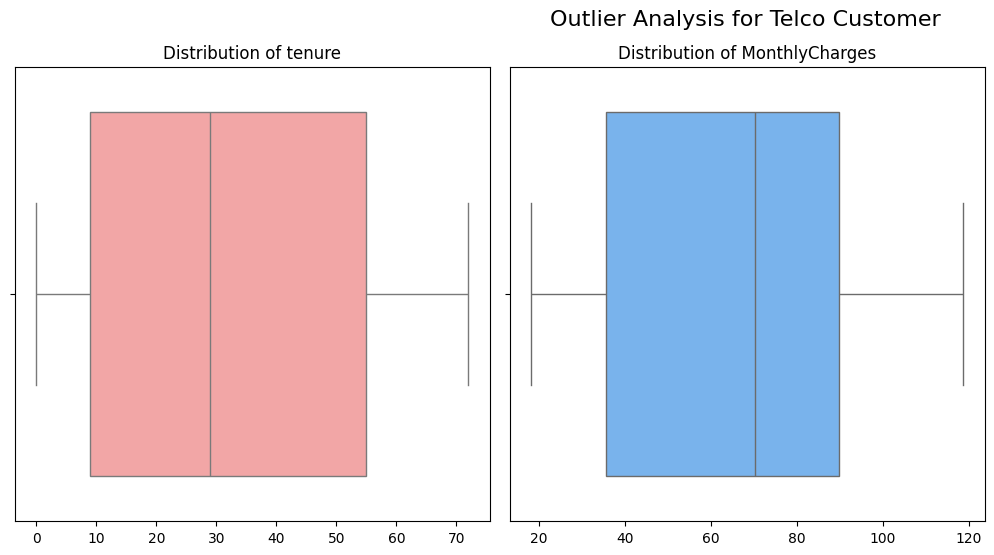

In [93]:
plt.figure(figsize=(15, 10))
data_boxplot=data[["tenure","MonthlyCharges"]]
colors = ['#ff9999', '#66b3ff']

for i, j in enumerate(data_boxplot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data_boxplot[j], color=colors[i])
    plt.title(f'Distribution of {j}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle('Outlier Analysis for Telco Customer', fontsize=16, y=1.02)
plt.show()

The values ​​shown in the boxplot can't be considered as outliers.


---



In [94]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [95]:
cat_data=data[['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]

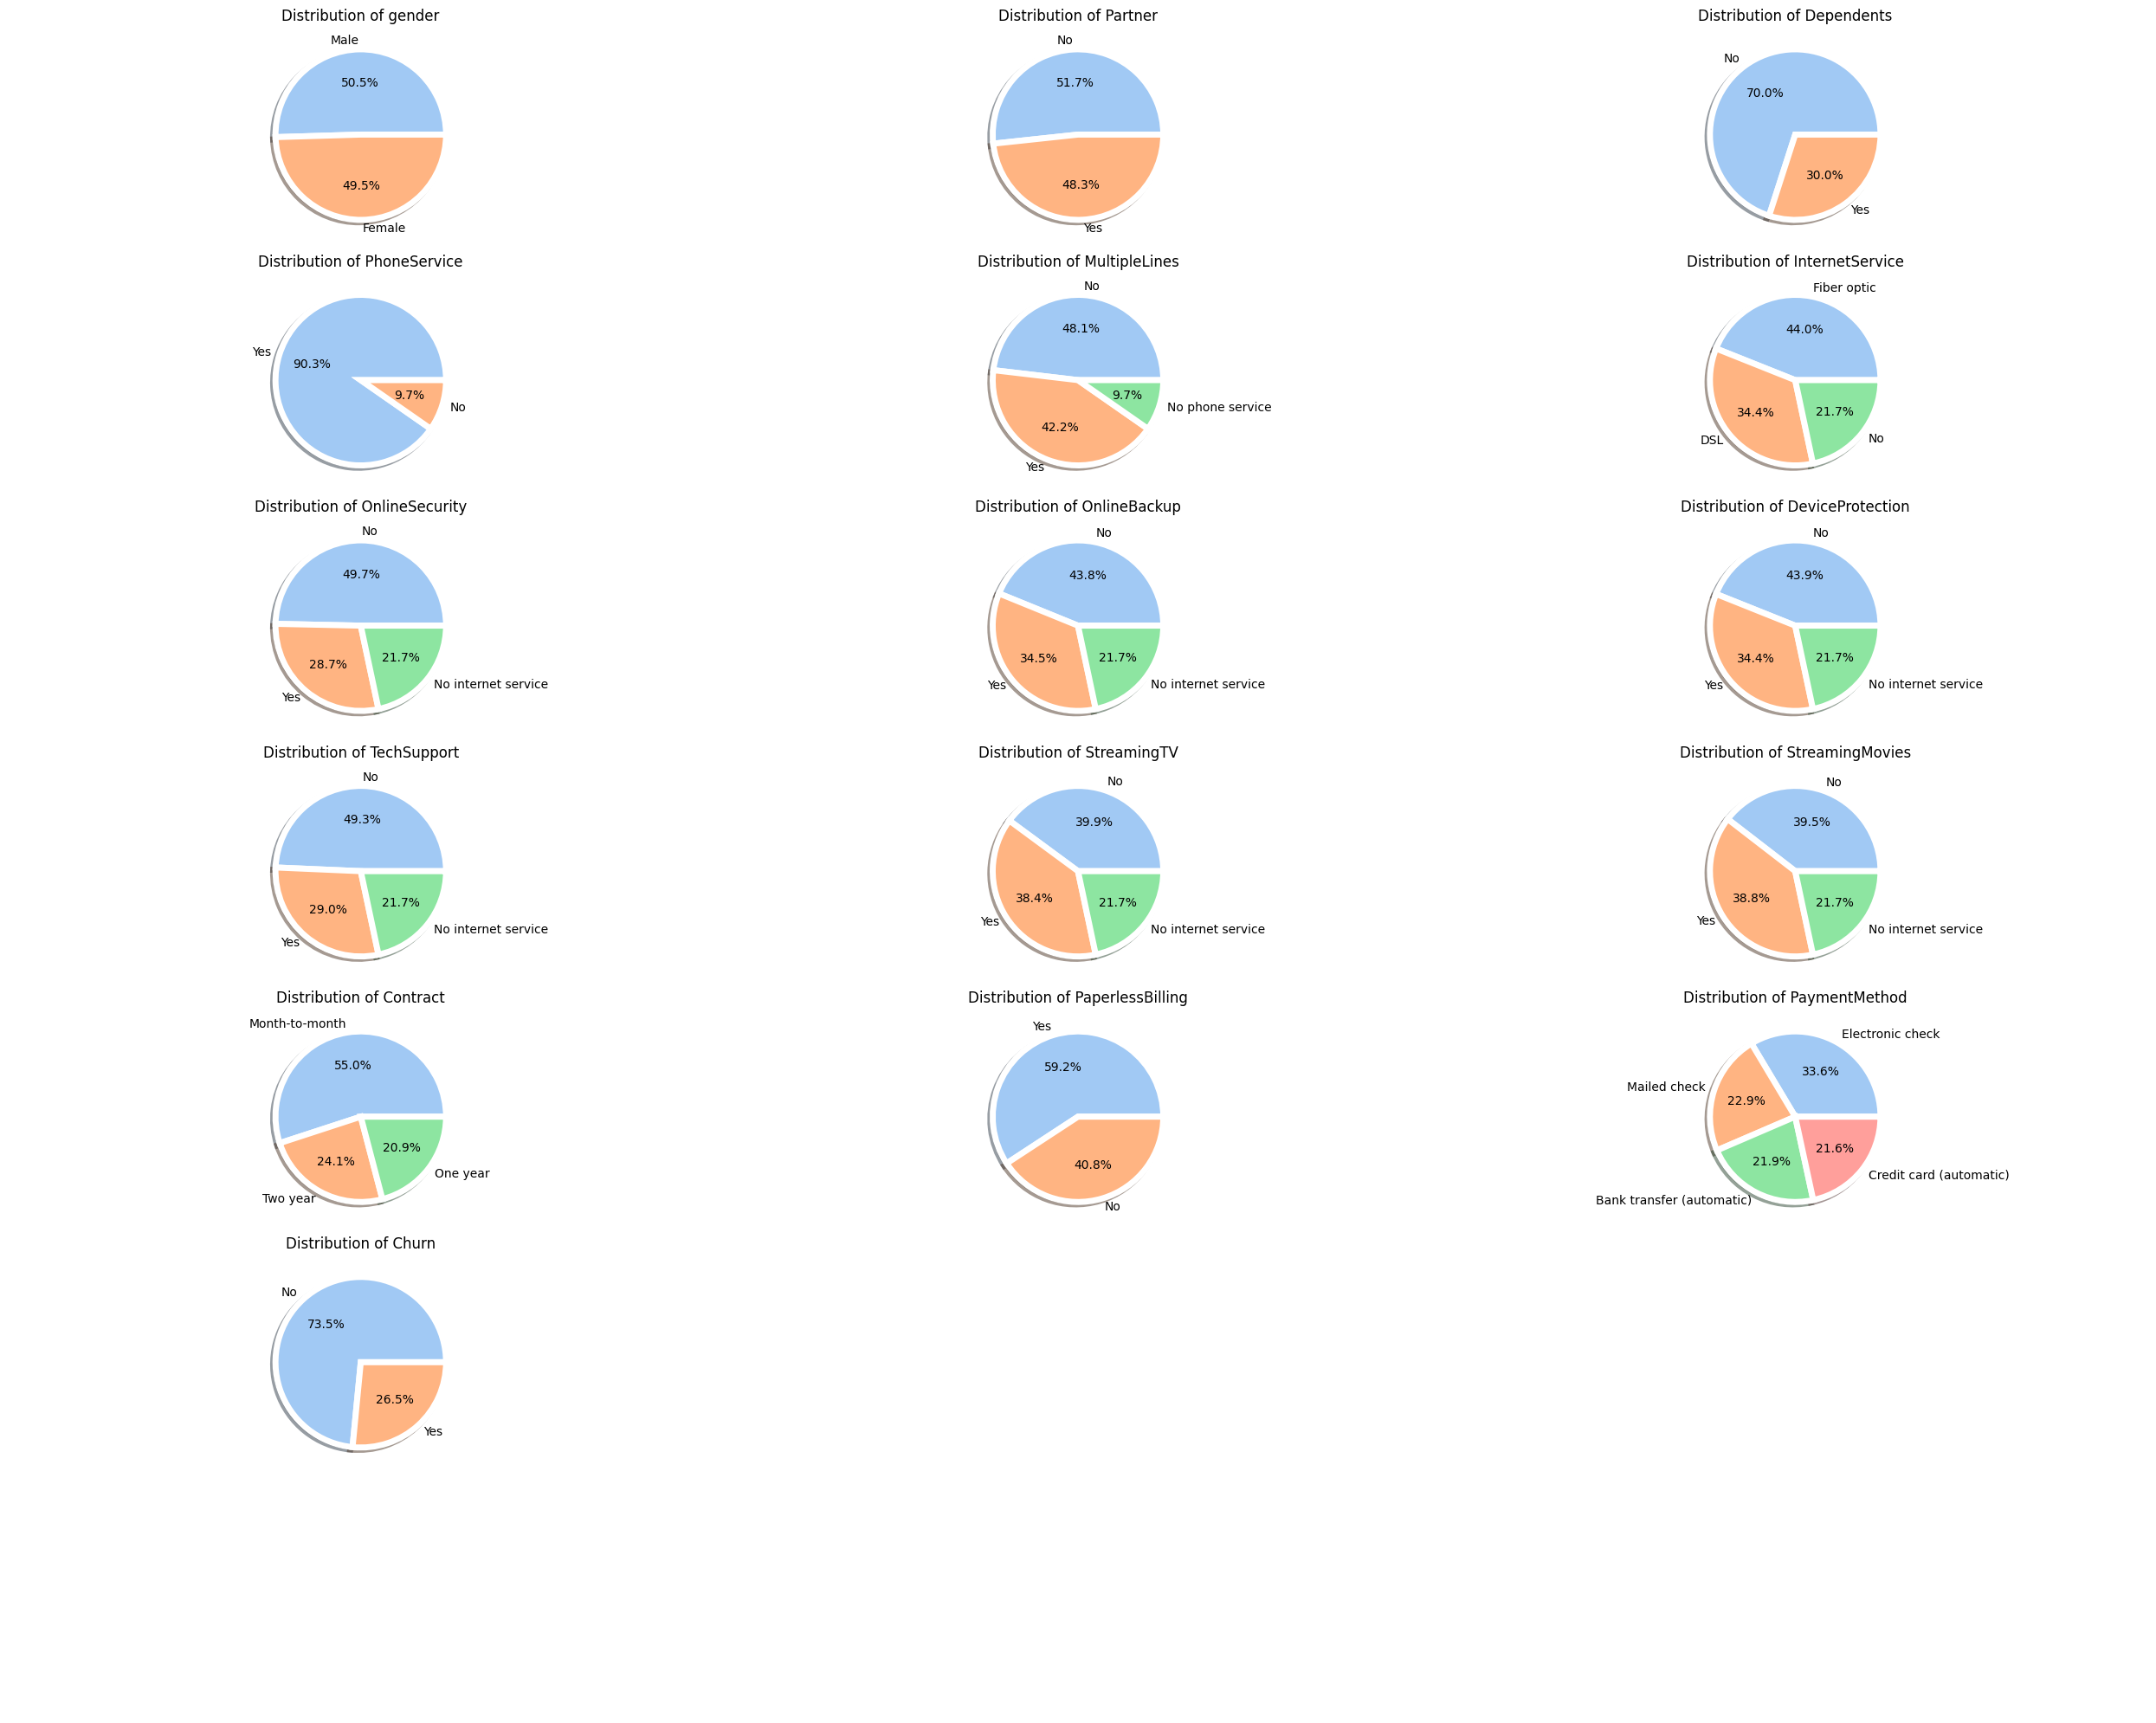

In [96]:
n_cols = len(cat_data.columns)
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 20))
axes = axes.flatten()

for i, col in enumerate(cat_data.columns):
    x = cat_data[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True)
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

* From the pie plot we can answer these questions.

##what is the ratio between males and females in our company?

The percentage of men is 50.5% and the percentage of women is 49.5%.

---




##what is the ratio between who has partners and not in our company?
The percentage of those who have partners is 48.3% and the percentage of those who do not have partners is 51.7%.


---



##what is the ratio between who has dependents and not in our company?
The percentage of those who have dependents is 30% and the percentage of those who do not have dependents is 70%.


---



##what is the ratio between who has MultipleLines and not in our company?

The percentage of those who have multiple lines is 42.2%, those who don't have multiple lines is 48.1%, and the percentage of those who don't have phone service is 9.7%.


---



##what is the ratio between Senior Citizens and others in our company?
The percentage of Senior Citizens is 16.2%, while the percentage of non-Senior Citizens is 83.8%.



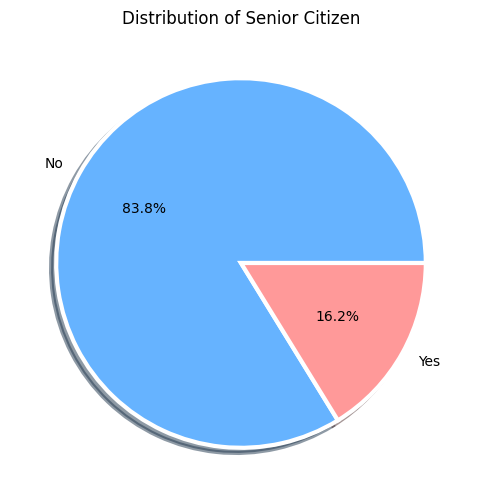

In [97]:
plt.figure(figsize=(8, 6))
plt.pie(data['SeniorCitizen'].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'], wedgeprops={"linewidth": 3, "edgecolor": "white"},shadow=True)
plt.title("Distribution of Senior Citizen")
plt.show()



---



In [98]:
corr_matrix=numeric_data.corr()

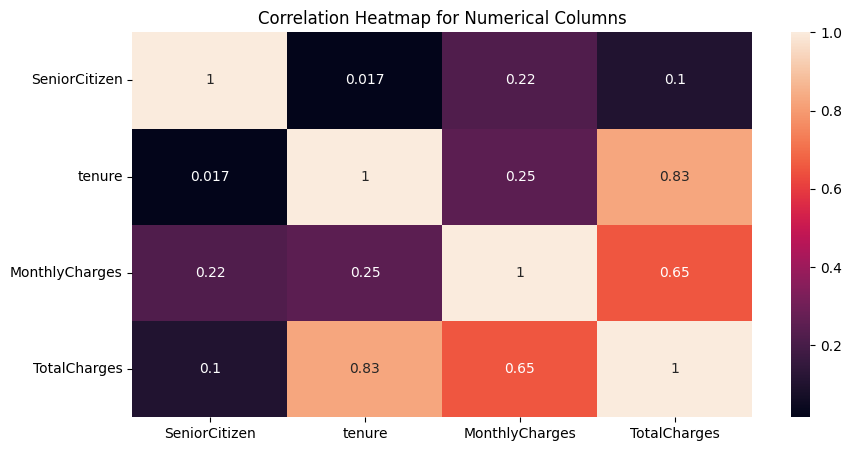

In [99]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

* Encoding categorical columns to calculate correlation

In [100]:
En_data=cat_data.copy()

In [101]:
yes_no={"No":0, "Yes":1}
En_data=En_data.map(lambda x: yes_no.get(x,x))

In [102]:
gender={'Female':0, 'Male':1}
En_data["gender"]=En_data["gender"].apply(lambda x: gender[x])

In [103]:
MultipleLines={0:0, 1:1 ,"No phone service":2}
En_data["MultipleLines"]=En_data["MultipleLines"].apply(lambda x: MultipleLines[x])

In [104]:
InternetService={0:0, 'DSL':1 ,'Fiber optic':2}
En_data["InternetService"]=En_data["InternetService"].apply(lambda x: InternetService[x])

In [105]:
OnlineSecurity={0:0,  1:1,'No internet service':2}
En_data["OnlineSecurity"]=En_data["OnlineSecurity"].apply(lambda x: OnlineSecurity[x])

In [106]:
OnlineBackup={ 0:0, 1:1 , 'No internet service':2}
En_data["OnlineBackup"]=En_data["OnlineBackup"].apply(lambda x: OnlineBackup[x])

In [107]:
DeviceProtection={0:0, 1:1,'No internet service':2}
En_data["DeviceProtection"]=En_data["DeviceProtection"].apply(lambda x: DeviceProtection[x])

In [108]:
TechSupport={0:0, 1:1,'No internet service':2}
En_data["TechSupport"]=En_data["TechSupport"].apply(lambda x: TechSupport[x])

In [109]:
StreamingTV={0:0, 1:1,'No internet service':2}
En_data["StreamingTV"]=En_data["StreamingTV"].apply(lambda x: StreamingTV[x])

In [110]:
StreamingMovies={0:0, 1:1,'No internet service':2}
En_data["StreamingMovies"]=En_data["StreamingMovies"].apply(lambda x: StreamingMovies[x])

In [111]:
Contract={'Month-to-month':0 ,'One year':1, 'Two year':2}
En_data["Contract"]=En_data["Contract"].apply(lambda x: Contract[x])

In [112]:
PaymentMethod={'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
 'Credit card (automatic)':3}
En_data["PaymentMethod"]=En_data["PaymentMethod"].apply(lambda x: PaymentMethod[x])

In [113]:
cat_matrix=En_data.corr()

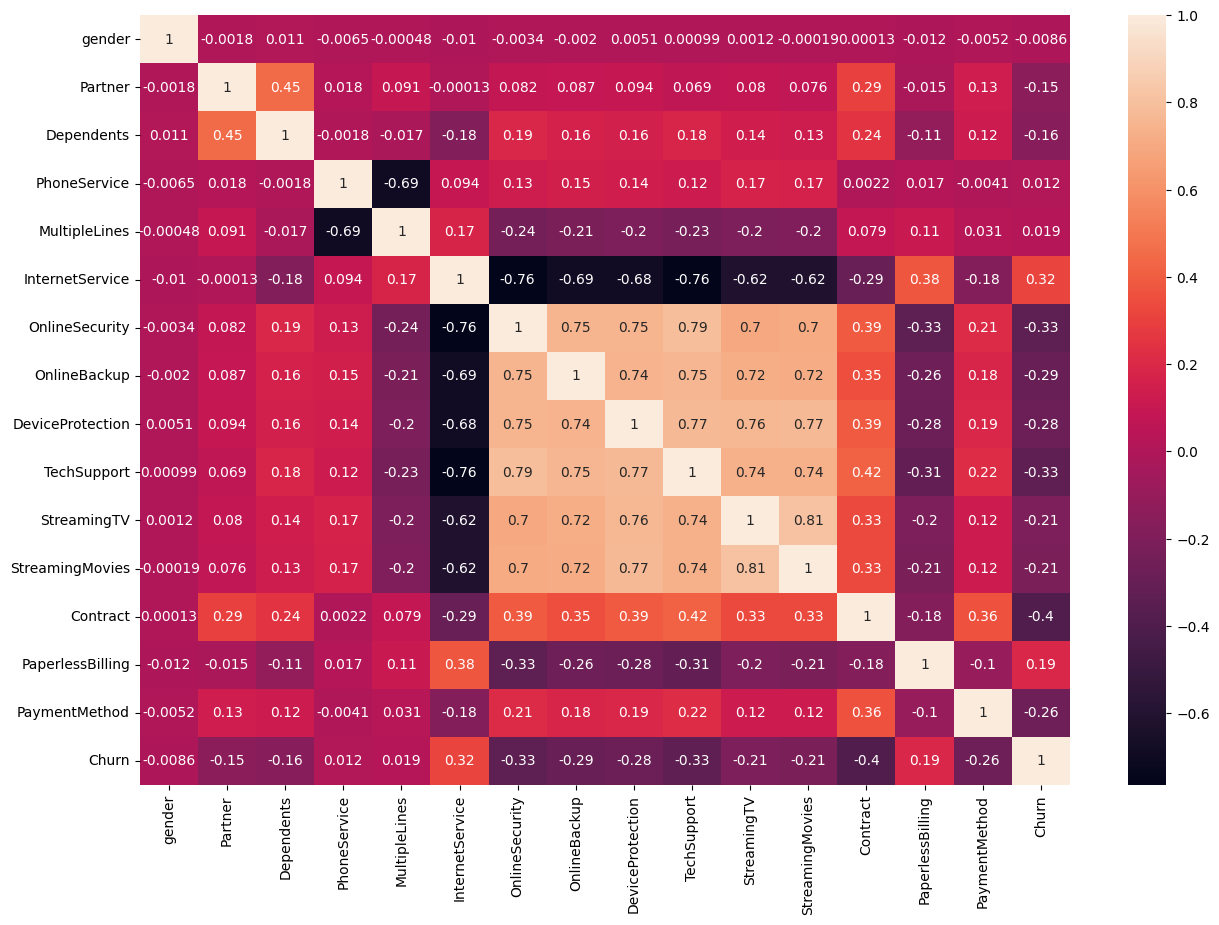

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(cat_matrix, annot=True)
plt.show()

## Depending on the correlation matrix, which variables have a strong relationship with each other?

* Online Security and Tech Support - Strong positive correlation (0.79), indicating that customers with online security often also have tech support.

* Streaming TV and Streaming Movies - Strong positive correlation (0.81), suggesting that customers who have one streaming service are likely to have the other as well.

* Online Security and Online Backup - Strong positive correlation (0.75), showing that customers with online security tend to also have online backup services.

* Device Protection and Tech Support - Strong positive correlation (0.77), indicating that customers with device protection often have tech support as well.

* Device Protection and Online Security - Strong positive correlation (0.74), suggesting that customers with online security also often have device protection.

* Device Protection and Online Backup - Strong positive correlation (0.75), meaning customers with device protection frequently also have online backup.

* Streaming TV and Tech Support - Moderate to strong positive correlation (0.72), showing that customers with streaming services may also have tech support.

* Streaming Movies and Tech Support - Similar to Streaming TV, this has a positive correlation (0.74) with tech support.

##From the previous question,What is the relationship between the Internet Services and the churn rate?
the correlation between Internet Service and Churn is 0.32, it indicates a weak to moderate positive relationship. This means that customers with certain types of internet services might be slightly more likely to leave (churn). Although the correlation is not very strong, it suggests that the type of internet service provided could have a mild influence on whether customers decide to stay or leave. For example, customers with lower satisfaction in internet service might show a higher tendency to churn.


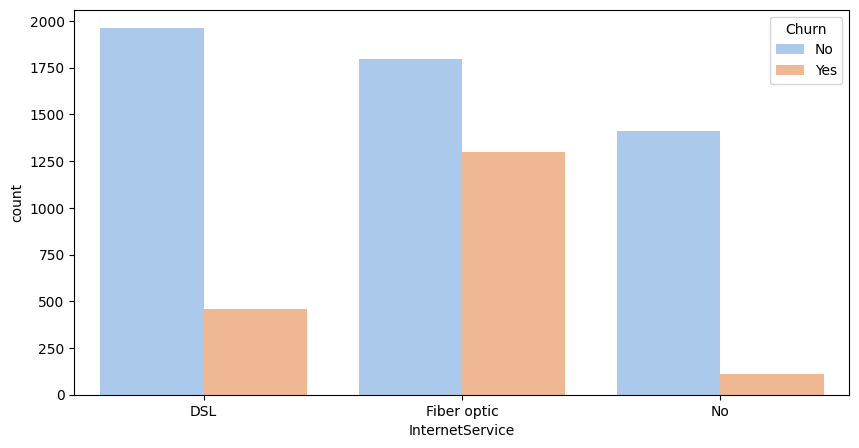

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, hue="Churn",  x="InternetService")
plt.xlabel("InternetService")
plt.show()

From the Bar chart between Churn and InternetService it is clear that customers who have Fiber optic service tend to leave which indicates that there may be a problem with this service that is causing customers to leave.



---



##How many Internet Services we provide in our company?
* 44% of services are fiber optic.
* 34.4% of services are DSL.

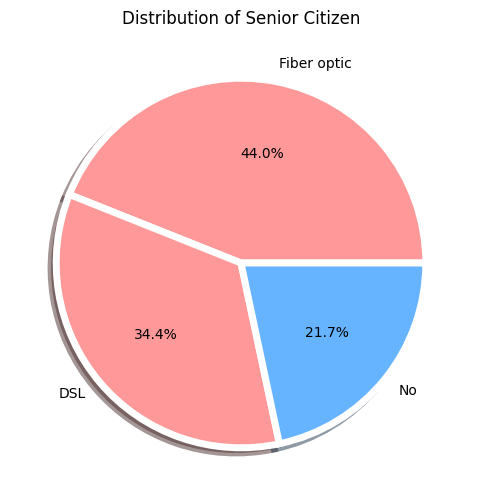

In [116]:
plt.figure(figsize=(8, 6))
plt.pie(data['InternetService'].value_counts(),labels=['Fiber optic' ,'DSL', "No"] ,autopct='%1.1f%%',
        colors=['#ff9999', '#ff9999','#66b3ff'], wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True)
plt.title("Distribution of Senior Citizen")
plt.show()



---



##What is our Contract types we provide?
* 55% of contracts are month-to-month.
* 20.9% of contracts are one-year contracts.
* 24.1% of contracts are two-year contracts.


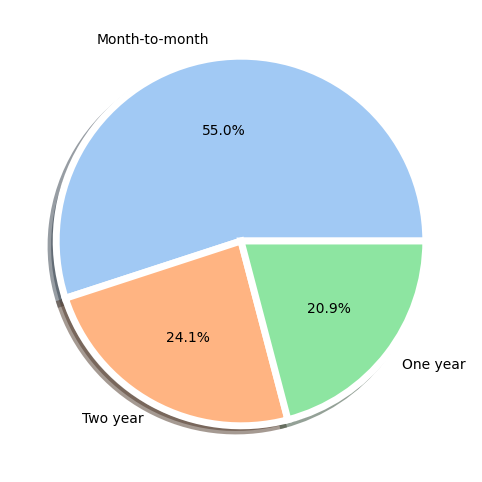

In [117]:
plt.figure(figsize=(8,6))
x=data["Contract"].value_counts()
labels=x.index.tolist()
plt.pie(x, autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True, labels=labels )
plt.show()



---



##How many customers uses StreamingTV ?
38.4% of customers use StreamingTV

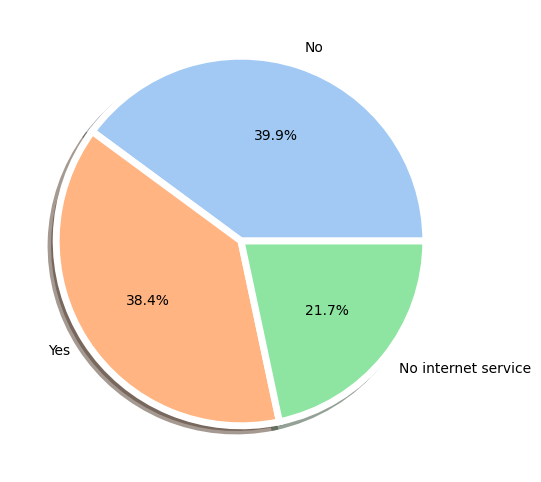

In [118]:
plt.figure(figsize=(8,6))
y=data["StreamingTV"].value_counts()
lab=y.index.tolist()
plt.pie(y, autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True, labels=lab )
plt.show()



---



##What is the ratio between users who streaming movies to StreamingTV subscribers?


Based on the data and analysis conducted, the ratio of users who stream movies only to those who subscribe to streaming TV only is 103.26%. This indicates that the number of users who stream movies only is slightly higher than the number of users who subscribe to streaming TV only.

In [119]:
only_Movies = data[(data['StreamingMovies'] == "Yes") & (data['StreamingTV'] == "No")].shape[0]
only_Tv = data[(data['StreamingMovies'] == "No") & (data['StreamingTV'] == "Yes")].shape[0]
both_stream = data[(data['StreamingMovies'] == "Yes") & (data['StreamingTV'] == "Yes")].shape[0]
no_internet = data[(data['StreamingMovies'] == 'No internet service') & (data['StreamingTV'] == 'No internet service')].shape[0]
Total_User=len(data)-no_internet


only_Movies_percentage=(only_Movies/Total_User)*100
only_Tv_percentage=(only_Tv/Total_User)*100
both_stream_percentage=(both_stream/Total_User)*100
ratio_movies_to_tv=(only_Movies/only_Tv)*100

print("Total number of users:", Total_User)
print("Number of users who watch movies only:", only_Movies)
print("Number of users subscribed to TV streaming only:", only_Tv)
print("Number of users using both services:", both_stream)
print("Percentage of users who watch movies only:", only_Movies_percentage, "%")
print("Percentage of users subscribed to TV streaming only:", only_Tv_percentage, "%")
print("Percentage of users using both services:", both_stream_percentage, "%")
print("Ratio of users who watch movies to TV subscribers:", ratio_movies_to_tv, "%")

Total number of users: 5517
Number of users who watch movies only: 792
Number of users subscribed to TV streaming only: 767
Number of users using both services: 1940
Percentage of users who watch movies only: 14.355628058727568 %
Percentage of users subscribed to TV streaming only: 13.902483233641473 %
Percentage of users using both services: 35.16403842668117 %
Ratio of users who watch movies to TV subscribers: 103.25945241199479 %




---



##Is there a strong relationship between the monthly recharge rate and the dependents?

1. Low-charge concentration: Many customers pay low monthly charges (20-30), including both dependents and non-dependents.


2. Dependents vs. Non-Dependents: Non-dependents are more concentrated in higher charge ranges (60-120), while dependents mostly appear in lower ranges.


3. Cost preference: Dependent customers prefer lower charges, likely for economic reasons.



In summary, non-dependent customers generally have higher monthly charges

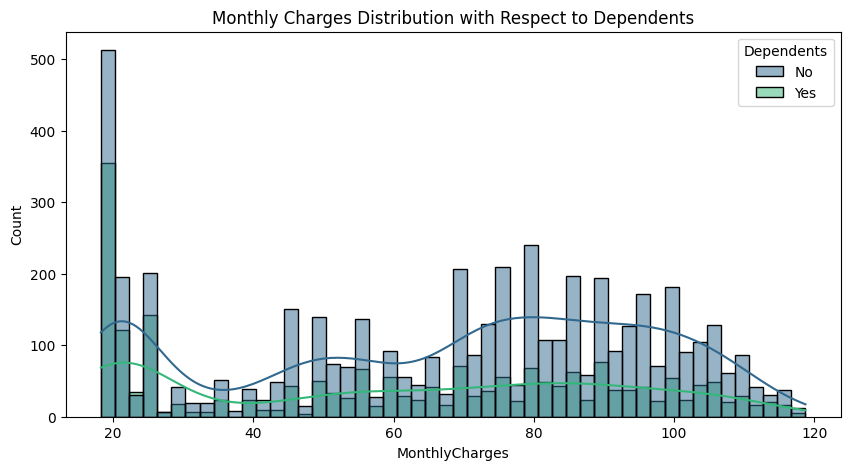

In [120]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, hue="Dependents", x="MonthlyCharges" , palette='viridis',bins=50, kde=True)
plt.title("Monthly Charges Distribution with Respect to Dependents")
plt.xlabel("MonthlyCharges")

plt.show()



---



## Who is the the most important customer in the company according to Monthly and Total charges?


According to records, customer 7569-NMZYQ has the highest average monthly spending, whereas customer 2889-FPWRM has the highest total spending since they became our client.

In [121]:
highest_monthly_customer = data.loc[data['MonthlyCharges'].idxmax(), 'customerID']
print("The customer with the highest Monthly Charges is:", highest_monthly_customer)
highest_total_customer = data.loc[data['TotalCharges'].idxmax(), 'customerID']
print("The customer with the highest Total Charges is:", highest_total_customer)


The customer with the highest Monthly Charges is: 7569-NMZYQ
The customer with the highest Total Charges is: 2889-FPWRM




---



## How many payment methods we provide? and what is the ratio between each others?
**Payment methods and percentage:**

* Electronic check transfer: 33.6%
* Post check: 22.9%
* Automated bank transfer: 21.9%
* Automated credit cards: 21.6%

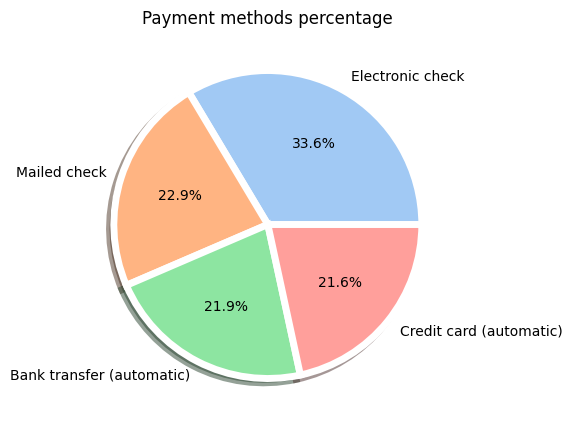

In [122]:
plt.figure(figsize=(10,5))
plt.pie(data["PaymentMethod"].value_counts(),autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True,labels=data["PaymentMethod"].value_counts().index.tolist() )
plt.title("Payment methods percentage")
plt.show()



---



## What is our churn rate?
Churn rate is 26.5%. This means that 26.5% of customers have stopped using products or services.
While 73.5% customer retention is encouraging, the churn rate is still relatively high and requires further examination.


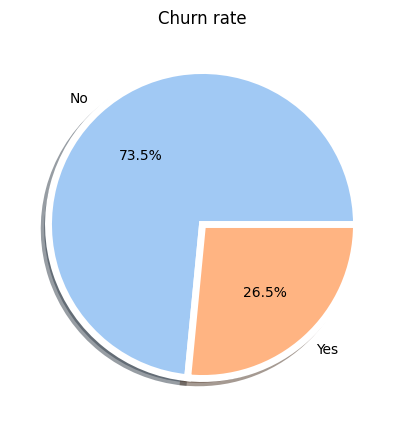

In [123]:
plt.figure(figsize=(10,5))
plt.pie(data["Churn"].value_counts(),autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True,labels=data["Churn"].value_counts().index.tolist()  )
plt.title("Churn rate")
plt.show()



---



##What is the average monthly charge?
Based on available data, the average amount customers pay per month for the service provided is $64.76.

In [124]:
MonthlyCharges_average=data["MonthlyCharges"].mean()
MonthlyCharges_average

64.76169246059918



---



## From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?
The correlation value between the two variables is 0.22, which is considered a low value, confirming that the relationship between the two variables is weak.

This means a weak positive relationship between being an older user (SeniorCitizen=1) and a higher monthly fee.

In other words, older users tend to pay higher monthly fees compared to the younger age group.

From the histogram, we conclude that in general, we notice a higher concentration of higher monthly fee values ​​in the elderly user group

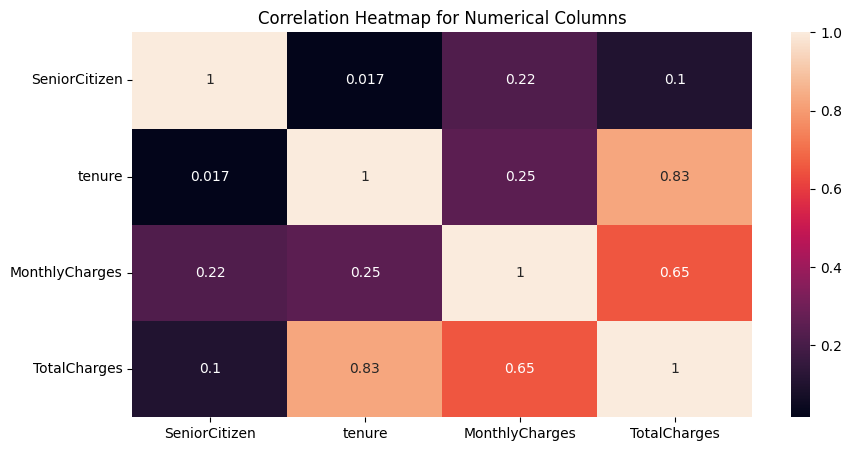

In [125]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

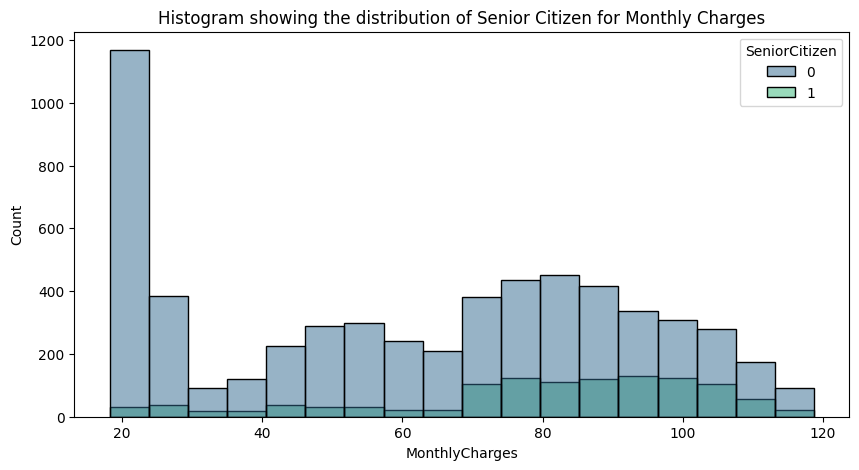

In [126]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, hue="SeniorCitizen", x="MonthlyCharges", palette='viridis')
plt.title("Histogram showing the distribution of Senior Citizen for Monthly Charges")
plt.show()

##We want to give offers according to the monthly charge categories, can you explain that?

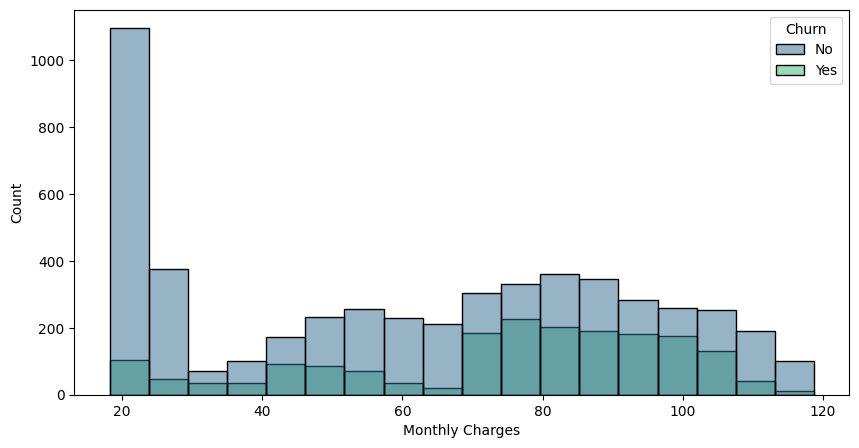

In [127]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", palette='viridis')
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

This chart shows the distribution of Monthly Charges for customers of a service, broken down by churn status. Each column represents the number of customers who pay a monthly charge within a certain range, and whether they decided to churn (Yes) or not (No).

**The relationship between Monthly Charges and churn:**

* Low Charges: Data shows that customers who pay low monthly Charges (less than $40) are less likely to withdraw.

* Medium Charges: Withdrawal rates increase slightly as monthly Charges increase, especially in the $40-$70 range.

* High Charges: Withdrawal rates appear to increase relatively more in the $70+ range.

In [128]:
Low_Charges = data[(data['MonthlyCharges'] <40)]
Medium_Charges=data[(data["MonthlyCharges"]>=40) & (data["MonthlyCharges"]<70)]
High_Charges=data[(data["MonthlyCharges"]>=70)]

print(f"Number of users who fall into the Low Charges category: {Low_Charges.shape[0]}")
print(f"Number of users who fall into the Medium Charges category: {Medium_Charges.shape[0]}")
print(f"Number of users who fall into the High Charges category: {High_Charges.shape[0]}")

Number of users who fall into the Low Charges category: 1837
Number of users who fall into the Medium Charges category: 1615
Number of users who fall into the High Charges category: 3591


Placed offer for each category in a column called Offer1.





In [129]:
def offer (charge):
 if charge <40:
  return "ِِAnnual subscription discount"
 elif 40 <= charge <70:
  return "Discounted add-on services"
 else:
  return "Loyalty rewards"

In [130]:
data["Offer1"]=data["MonthlyCharges"].apply(offer)

**To design offers that fit each segment and achieve the goal of ensuring customer retention while increasing profit, the following offers can be proposed:**

* Low Charges (Below $40):

Add-on Features for a Small Additional Fee: Offer new features, such as an upgrade in service quality or exclusive perks, for a small additional fee.
This allows the customer to feel they are receiving more value without a significant increase in their monthly cost.

Annual Subscription Discount: Provide a minor discount if the customer chooses an annual subscription instead of a monthly one. This approach encourages longer retention and increases annual revenue.

* Medium Charges ($40  to  $70):

Temporary Upgrade to a Higher Package: Offer a free trial of a higher package for one or two months, highlighting the benefits they would receive if they continue with the upgraded plan after the trial period.

Discounted Add-On Services: Provide additional services, such as premium support or access to exclusive content, at a discounted rate of up to 20% off the original price. This could entice the customer to try out these added services while generating extra revenue for the company.

* High Charges ($70 and Above):

Flexible Package Option: Offer a customizable package where the customer can select the specific services they need, allowing them to pay only for what they use. This gives the customer a sense of control over their monthly charges and reduces the likelihood of churn.

Loyalty Rewards: Provide loyalty points or a gradual reduction in monthly fees after a certain subscription period, such as a 5% discount every three months. This ensures customer retention and reinforces loyalty without a significant impact on profits.

In this way, the offers are varied and balanced to promote both customer retention and increased revenue.



---



## We want to present offers by gender and the Partner, could you explain that?



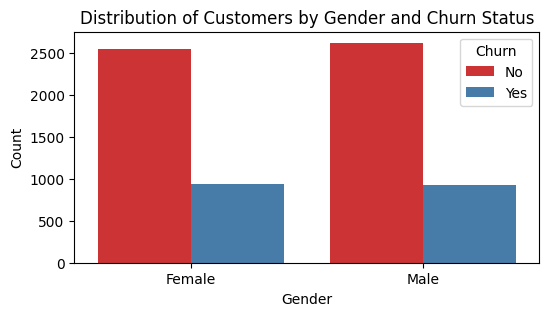

In [131]:
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='gender', hue='Churn', palette='Set1')
plt.title('Distribution of Customers by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

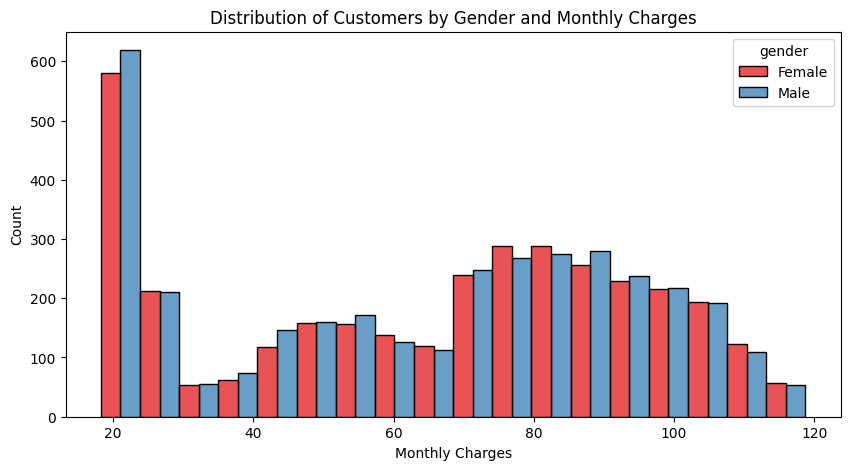

In [132]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="MonthlyCharges", hue="gender", palette='Set1', multiple="dodge")
plt.title("Distribution of Customers by Gender and Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

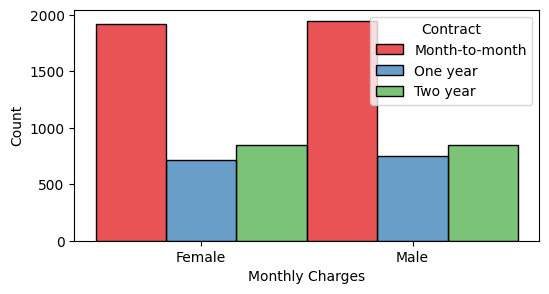

In [133]:
plt.figure(figsize=(6,3))
sns.histplot(data=data, hue="Contract", x="gender", palette='Set1', multiple="dodge")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

**These charts show that the number of males and females is approximately equal for Churn, Monthly Charges, and Contract type.**

---



The data were divided into four subgroups based on gender and partner presence.

In [134]:
Male_with_Partner = data[(data['gender'] =="Male") & (data['Partner'] =="Yes")]
Male_without_Partner=data[(data["gender"]=="Male")& (data["Partner"]=="No")]
Female_with_Partner = data[(data['gender'] =="Female") & (data['Partner'] =="Yes")]
Female_without_Partner=data[(data["gender"]=="Female")& (data["Partner"]=="No")]

Placed offer for each category in a column called Offer2.


In [135]:
def gender_Partner(gender,Partner):
  if gender=="Male" and Partner=="Yes":
    return " Shared plans with unlimited free calls"
  elif gender=="Male" and Partner=="No":
    return "Gaming packages and subscriptions"
  elif gender =="Female" and  Partner=="Yes":
    return "Smart home device bundles"
  else:
    return  "Streaming service subscriptions"


In [136]:
data["Offer2"]=data.apply(lambda row:gender_Partner(row['gender'],row["Partner"]), axis=1 )

**Products or services can be suggested that are in line with the needs of each category.**

* Males with partners:

  Shared packages: Offer shared packages with special discounts that include shared calls and data, focusing on features such as unlimited free calls between partners, and shared music services.
Dual smart devices: Offer deals on the latest smartphones with discounts when buying two devices together.

* Males without partners:

 Video games: Offer deals on games and packages that support online gaming.
Entertainment apps: Promote music, video, and podcast apps.

* Females with partners:

 Smart home appliances: Offer deals on smart devices that facilitate household chores, such as voice assistants and smart controls.

* Females without partners:

 Streaming services: Offer deals on TV and movie streaming services.

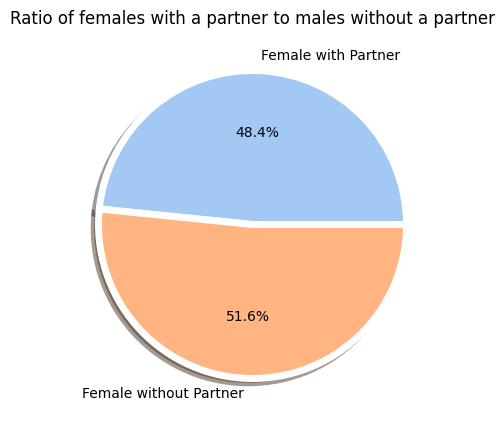

In [137]:
sizes = [Female_with_Partner.shape[0], Female_without_Partner.shape[0]]
labels = ["Female with Partner", "Female without Partner"]
plt.figure(figsize=(10,5))
plt.pie(sizes,autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True,labels=labels  )
plt.title("Ratio of females with a partner to males without a partner")
plt.show()

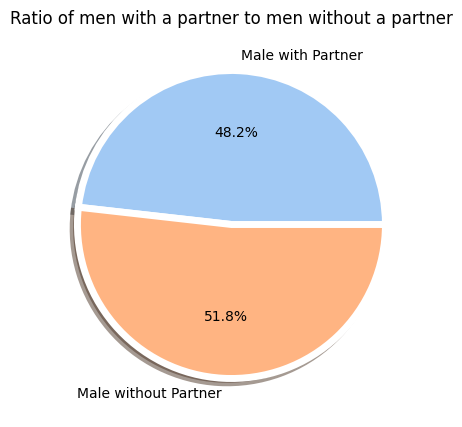

In [138]:
sizes = [Male_with_Partner.shape[0], Male_without_Partner.shape[0]]
labels = ["Male with Partner", "Male without Partner"]
plt.figure(figsize=(10,5))
plt.pie(sizes,autopct="%1.1f%%", wedgeprops={"linewidth": 5, "edgecolor": "white"},shadow=True,labels=labels  )
plt.title("Ratio of men with a partner to men without a partner")
plt.show()

#Encoding

In [139]:
data=data.map(lambda x: yes_no.get(x,x))
data["gender"]=data["gender"].apply(lambda x: gender[x])
data["MultipleLines"]=data["MultipleLines"].apply(lambda x: MultipleLines[x])
data["InternetService"]=data["InternetService"].apply(lambda x: InternetService[x])
data["OnlineSecurity"]=data["OnlineSecurity"].apply(lambda x: OnlineSecurity[x])
data["OnlineBackup"]=data["OnlineBackup"].apply(lambda x: OnlineBackup[x])
data["DeviceProtection"]=data["DeviceProtection"].apply(lambda x: DeviceProtection[x])
data["TechSupport"]=data["TechSupport"].apply(lambda x: TechSupport[x])
data["StreamingTV"]=data["StreamingTV"].apply(lambda x: StreamingTV[x])
data["StreamingMovies"]=data["StreamingMovies"].apply(lambda x: StreamingMovies[x])
data["Contract"]=data["Contract"].apply(lambda x: Contract[x])
data["PaymentMethod"]=data["PaymentMethod"].apply(lambda x: PaymentMethod[x])

Encoding the new columns  for offers (Offer 1, Offer 2)



In [140]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Offer1']=encoder.fit_transform(data['Offer1'])
data["Offer2"]=encoder.fit_transform(data["Offer2"])

In [141]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Offer1,Offer2
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,1,0,29.85,29.85,0,2,2
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,0,1,0,1,56.95,1889.50,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,1,1,53.85,108.15,1,0,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,0,0,1,0,2,42.30,1840.75,0,0,1
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,1,0,70.70,151.65,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,84.80,1990.50,0,1,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,1,1,1,3,103.20,7362.90,0,1,2
7040,4801-JZAZL,0,0,1,1,11,0,2,1,1,...,0,0,0,1,0,29.60,346.45,0,2,2
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,1,1,74.40,306.60,1,1,0


#Scaling

In [142]:
data=data.drop("customerID", axis=1)                                             #Remove customerID column

In [143]:
data_max=data.max()
scaled_data=data.divide(data_max)

In [144]:
scaled_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Offer1,Offer2
0,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.5,0.0,0.5,...,0.0,0.0,0.0,1.0,0.000000,0.251368,0.003437,0.0,1.0,0.666667
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.5,0.5,0.0,...,0.0,0.0,0.5,0.0,0.333333,0.479579,0.217564,0.0,0.0,0.333333
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.5,0.5,...,0.0,0.0,0.0,1.0,0.333333,0.453474,0.012453,1.0,0.0,0.333333
3,1.0,0.0,0.0,0.0,0.625000,0.0,1.0,0.5,0.5,0.0,...,0.0,0.0,0.5,0.0,0.666667,0.356211,0.211951,0.0,0.0,0.333333
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.595368,0.017462,1.0,0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,1.0,0.333333,0.714105,0.229194,0.0,0.5,0.000000
7039,0.0,0.0,1.0,1.0,1.000000,1.0,0.5,1.0,0.0,0.5,...,0.5,0.5,0.5,1.0,1.000000,0.869053,0.847792,0.0,0.5,0.666667
7040,0.0,0.0,1.0,1.0,0.152778,0.0,1.0,0.5,0.5,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.249263,0.039892,0.0,1.0,0.666667
7041,1.0,1.0,1.0,0.0,0.055556,1.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.333333,0.626526,0.035303,1.0,0.5,0.000000
